<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/unsupervised-learning/clustering/k-means_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = np.zeros((2,200))

#Generate 100 Gaussian cluster around one point (1,1) and 100 Gaussian cluster around another point (10,9). X is 2 $\times$ 200 design matrix, each column is a data point

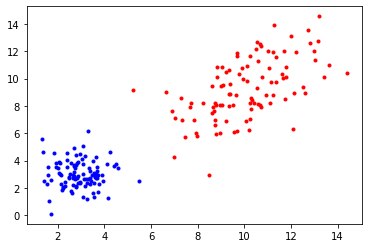

In [ ]:
for i in range(100):
  x,y = np.random.multivariate_normal([3,3],[[1,0],[0,1]])
  X[0,i] = x
  X[1,i] = y
  plt.plot(x,y,'b.')
  
for i in range(100,200):
  x,y = np.random.multivariate_normal([10,9],[[3,2],[2,5]])
  X[0,i] = x
  X[1,i] = y
  plt.plot(x,y,'r.')

#randomly generate two centroids

In [ ]:
mu_1 = np.asarray(np.random.uniform(0,20,2))

In [ ]:
mu_2 = np.asarray(np.random.uniform(0,20,2))

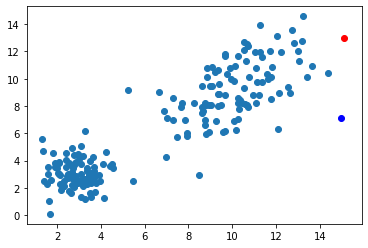

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(mu_1[0],mu_1[1],c='b')
plt.scatter(mu_2[0],mu_2[1],c='r')

In [ ]:
# in each iteration: make each point belong to the centroid closest to the point,
# and sum all the points up for that cluster to update the new centroid for that 
# cluster.

c = np.zeros(200) # c acts like a cluster assigning function: 
                  # given a point, it outputs 1 if that point belongs to centroid 1,
                  # and 2 if that point belongs to centroid 2 

for i in range(10):
  # calculate c function. Know which cluster each point belongs to
  for j in range(200):
    distance_to_mu_1 = np.linalg.norm(X[:,j]-mu_1)
    distance_to_mu_2 = np.linalg.norm(X[:,j]-mu_2)
    c[j] = 1 if distance_to_mu_1 < distance_to_mu_2 else 2
  # update centroids
  new_mu_1 = np.zeros((2))
  num_points_1 = 0
  new_mu_2 = np.zeros((2))
  num_points_2 = 0
  for index in range(200):
    if c[index] == 1:
      num_points_1 += 1
      new_mu_1 += X[:,index]
    else:
      num_points_2 += 1
      new_mu_2 += X[:,index]
  mu_1 = new_mu_1/num_points_1
  mu_2 = new_mu_2/num_points_2
      

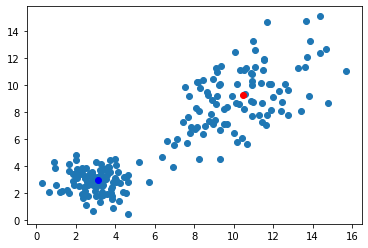

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(mu_1[0],mu_1[1],c='b')
plt.scatter(mu_2[0],mu_2[1],c='r')

In [ ]:
# now let's see how scikit-learn's K-means compare to ours:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X.T)

In [ ]:
centroids = kmeans.cluster_centers_
print(kmeans.cluster_centers_)

[[10.47401919  9.2238743 ]
 [ 3.1456496   2.96274526]]


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
print(mu_1)
print(mu_2)

[3.1456496  2.96274526]
[10.47401919  9.2238743 ]


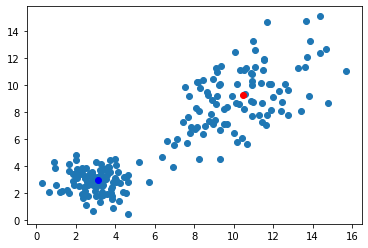

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.scatter(centroids[0,0],centroids[0,1],c='r')
plt.scatter(centroids[1,0],centroids[1,1],c='b')

look pretty close to mine! I implemented the correct version,

just maybe is not that elegant I guess.

and for scikit-learn we need to pass X for each instance in a row,

I did it so X is each instance in a column.

by the way, scikit-learn implements k-means++ which is more stable than our version

In [ ]:
 kmeans.predict([[0, 0],[10,10],[6,6],[7,7],[5,5]])

array([1, 0, 1, 0, 1], dtype=int32)